In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('conversion_data.csv')

In [3]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
len(dataset)

316200

The statistics are shown also for new_user and converted variables which are actually categorial variables. Also the maximum age is 123 which looks like an error.

Look for any null or empty values

In [6]:
 dataset.apply(lambda x: sum(x.isnull()),axis=0) 

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

None of the data points seems missing.

In [7]:
dataset.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Let's find how many values have age > 100.

In [8]:
len(dataset[dataset['age'] >= 100])

2

There are 2 values, could be errors/outliers, better to maybe remove them!!

In [9]:
dataset = dataset[dataset['age'] < 100]

In [10]:
len(dataset)

316198

Let's take a look at the distribution using plots.

### By countries

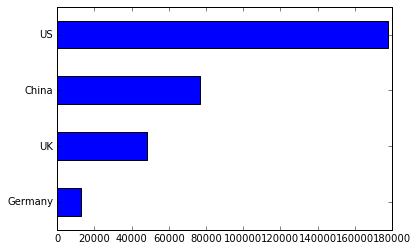

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
country_counts = dataset.country.value_counts(ascending=True)
country_counts.plot(kind='barh')

There are a huge number of people from US visiting this site. This could be a US site!!

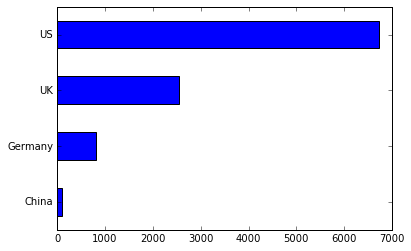

In [12]:
dataset1 = dataset[dataset['converted'] == 1]
country_counts1 = dataset1.country.value_counts(ascending=True)
country_counts1.plot(kind='barh')

Let's look at the actual conversion rate by country

In [13]:
dataset2 = dataset.groupby('country').sum()

In [14]:
dataset3 = dataset.groupby('country').count()

In [15]:
rates_country = dataset2*100/dataset3

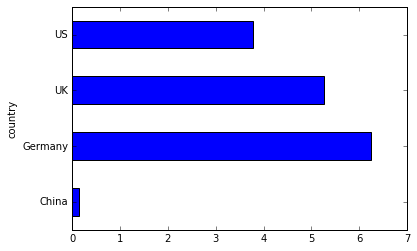

In [16]:
rates_country.converted.plot(kind = 'barh')

Conversion rate is the highest for Germany even though most viewers are from US.

### By source type.

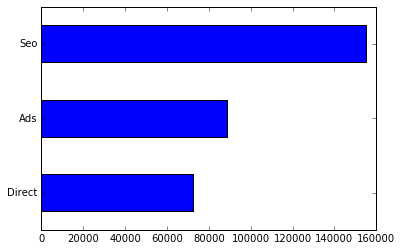

In [17]:
source_counts = dataset.source.value_counts(ascending=True)
source_counts.plot(kind='barh')

Most of the people come to this site after by clicking on search results. This could mean that the site appears in the search results and people become interested in the site and buy more than traffic got through ads or directly. There are also fewer people who bought products by knowing the website which means it is not yet a very popular site or people know about the website but do not remember the webpage by heart to use it directly and instead use search results.

But this does not tell us anything about the people who actually bought something after reaching the webpage through these sources. Let's look at the people who actually bought something.

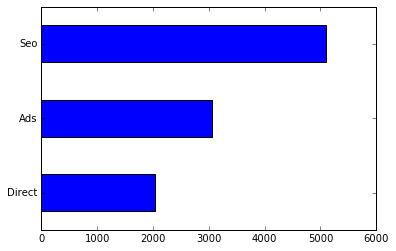

In [18]:
source_counts1 = dataset1.source.value_counts(ascending=True)
source_counts1.plot(kind='barh')

The trend follows, but the number of people who actually bought products from this webpage are only 1/30th of the people who visited this webpage.

Let's look at the actual conversion rate by source.

In [19]:
dataset4 = dataset.groupby('source').sum()

In [20]:
dataset5 = dataset.groupby('source').count()

In [21]:
rates_source = dataset4*100/dataset5

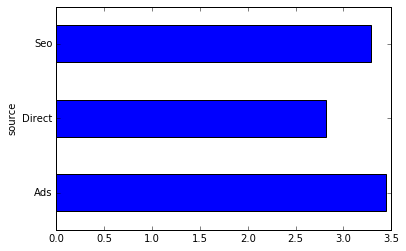

In [22]:
rates_source.converted.plot(kind = 'barh')

The conversion rate by source is highest for ads. So ads are infact useful as opposed to the previous belief that ads are not useful and has higher conversion rate and so does search results.

Let's plot a histogram of age and number of viewers to look at the distribution.

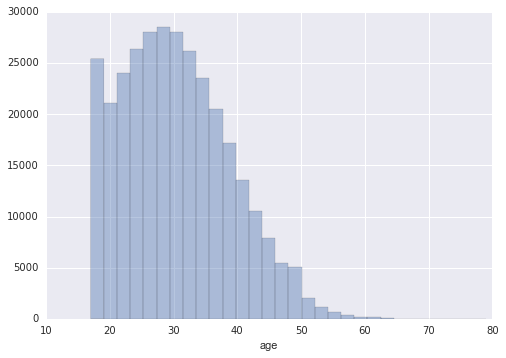

In [23]:
import seaborn as sns
sns.distplot(dataset['age'],bins=30,kde=False)
#dataset.age.plot(kind = 'hist')

Most of the users of this website are between the ages 20-35 which is a young group of people and it is less popular among peiple beyond age 40. Maybe the website is only targeting young people.

Now lets take a only at the people who actually bought products.

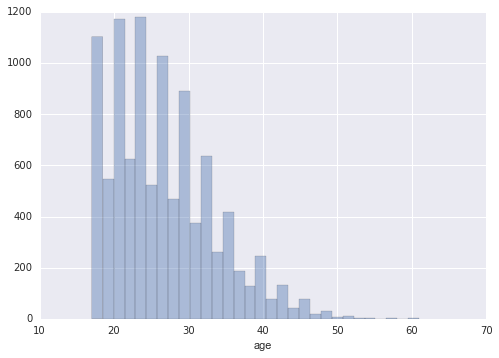

In [24]:
sns.distplot(dataset1['age'],bins=30,kde = False)

The number of people who bought products are a lot lesser by atleast a factor of 1/25 for age 20. Though people between 25-35 visited more, they bought products less often than people around age 20. This could be because people around age 20 are avid shoppers or they like the product more.

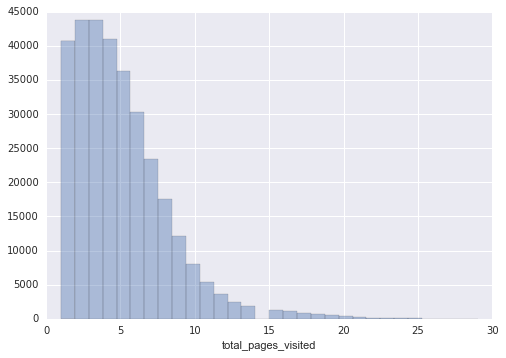

In [25]:
sns.distplot(dataset['total_pages_visited'],bins=30,kde = False)

Looking at this, many people visit and leave the website after spending very little time or after 5 pages. It is skewed to the right.

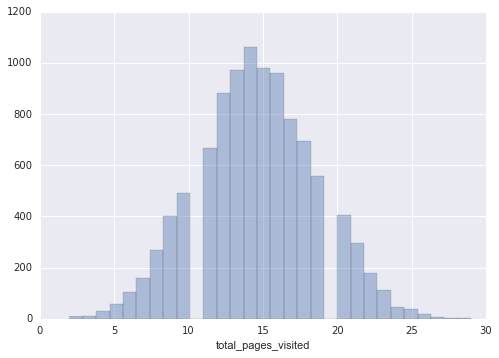

In [26]:
sns.distplot(dataset1['total_pages_visited'],bins=30,kde = False)

People who visited an average of about 15 pages, actually bought products through this website. The distribution is normal.

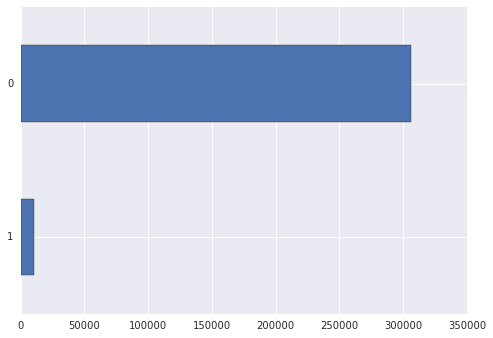

In [27]:
convert_counts = dataset.converted.value_counts(ascending=True)
convert_counts.plot(kind='barh')

This is such an imbalanced set, which would lead to high accuracy given that most of the visitors are not converted. Have to take care that only a part of non converted data set have to taken into account. Maybe by stratified sampling.

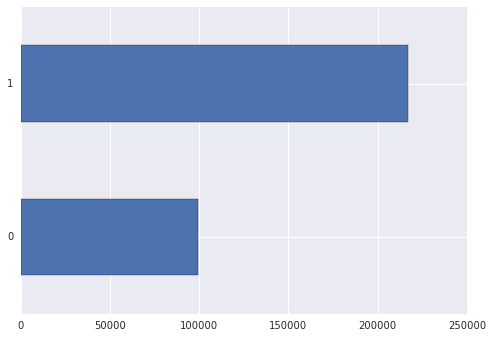

In [28]:
newuser_counts = dataset.new_user.value_counts(ascending=True)
newuser_counts.plot(kind='barh')

There are a lot more new users than multiple time visitors.

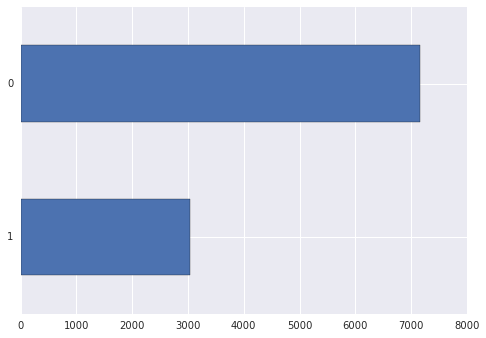

In [29]:
newuser1_counts = dataset1.new_user.value_counts(ascending=True)
newuser1_counts.plot(kind='barh')

But new users who are the majority of traffic bought a lot less than regular visitors.

Some insights:
* Most traffic from US but Germany had highest conversion rate
* Lot of people visit website through search but highest conversion rate is though ads - Ads are important as well as search tags could be important
* Age group 20-35 had highest number of purchases
* Regular users bought more than first timers
* People who visited an average of 15 pages bought products more frequently though most users quit after atmost 5 pages.

# Classification

This dataset has a huge imbalanced dataset. Training it as such will give high accuracy but most of the data will be classified as not converted. So, create a balanced dataset - I used 1:1 ratio to see how it goes. 

Have to convert the string of country and source to categorical variables.
Ref: http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/

The code below creates a sparse matrix for the source and country variables.

In [30]:
from sklearn.cross_validation import train_test_split
new_source = pd.get_dummies(dataset['source'])
new_country = pd.get_dummies(dataset['country'])
dataset = pd.concat([dataset,new_country,new_source], axis=1)

/Users/NiaVivek/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Imbalanced data set for getting only a proportion of 1:1 of converted and non-converted data set to avoid overfitting

In [31]:
import math
d1 = dataset[dataset['converted'] == 1]
d0 = dataset[dataset['converted'] == 0]
n = math.ceil(len(d0)/len(d1))
print(n)

31


Let's check scores for a number of classifiers and get the best one

In [32]:
from sklearn.utils import shuffle
import math
from sklearn.cross_validation import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

#clf = LogisticRegression()
classifiers=[("log_model",LogisticRegression()),
            ("svm", svm.SVC()),
            ("SGDC", SGDClassifier()),
            ("RF",RandomForestClassifier())]

accuracy = 0
accuracy_dev = 0
best_model = None
prediction = None
y = None
best_modelname = None

for name,clf in classifiers:
    d0 = shuffle(d0)
    i = 0
    for j in range(0, n-1):
        d2 = d0[i:len(d1)+i]
        i = len(d1)+i
        d = d2.append(d1)
        d = shuffle(d)

        X = d[['age', 'new_user','total_pages_visited', 'US','UK','China','Germany','Seo','Ads','Direct']]
        Y = d['converted']
        X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)
      

        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        clf_model = clf.fit(X_train, y_train)
        # Predict on test
        
        predicted1 = clf_model.predict(X_test)
        test_accuracy = accuracy_score(y_test,predicted1)


        # Save models and accuracy so that we can use it later
        if (test_accuracy > accuracy):
            accuracy = test_accuracy
            
            best_model = clf_model
            best_modelname = clf
            prediction = predicted1
            y = y_test


In [33]:
accuracy

0.94607843137254899

In [34]:
best_modelname

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

There could be overfitting of data, so best to do cross validation.

## Cross validation

Lets use cross validation to check for overfitting - can do it for the whole dataset which was split in the ratio 1:1, but limiting it to just one set due to space and time constraints.

Ref: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

In [35]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
import numpy as np

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [36]:
outcome_var = 'converted'
predictor_var = ['age', 'new_user','total_pages_visited', 'US','UK','China','Germany','Seo','Ads','Direct']

d1 = dataset[dataset['converted'] == 1]
d0 = dataset[dataset['converted'] == 0]
n = math.ceil(len(d0)/len(d1))

for name,clf in classifiers:
    print(name)
    print(clf)
    d0 = shuffle(d0)
    i = 0
    #for j in range(0, n-1):
    d2 = d0[i:len(d1)+i]
    i = len(d1)+i
    d = d2.append(d1)
    d = shuffle(d)
        
    classification_model(clf, d,predictor_var,outcome_var)

log_model
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy : 93.950%
Cross-Validation Score : 93.554%
Cross-Validation Score : 93.847%
Cross-Validation Score : 93.953%
Cross-Validation Score : 93.933%
Cross-Validation Score : 93.960%
svm
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy : 94.136%
Cross-Validation Score : 93.627%
Cross-Validation Score : 93.725%
Cross-Validation Score : 93.912%
Cross-Validation Score : 93.933%
Cross-Validation Score : 93.778%
SGDC
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.1

The best model with least overfitting is Logistic Regression

Can do hyper parameter tuning for logisticregression for better accuracy.

## Hyper-parameter tuning

In [37]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Set the parameters by cross-validation
best_clf_hyp = Pipeline([ ('clf', LogisticRegression())])

tuned_parameters = [{'clf__C': [1.0,2.0,3.0],'clf__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(best_clf_hyp, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    X = d[['age', 'new_user','total_pages_visited', 'US','UK','China','Germany','Seo','Ads','Direct']]
    Y = d['converted']
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=20)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
  
    clf.fit(X_train,y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/Users/NiaVivek/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best parameters set found on development set:

{'clf__C': 1.0, 'clf__solver': 'newton-cg'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.94      0.93      0.93      2027
          1       0.93      0.94      0.94      2053

avg / total       0.94      0.94      0.94      4080


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'clf__C': 1.0, 'clf__solver': 'newton-cg'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.94      0.93      0.93      2027
          1       0.93      0.94      0.94      2053

avg / total       0.94      0.94      0.94      4080




1:1 ratio gives an accuracy of about 94% which is pretty good considering that using the whole dataset gave an accuracy of about 98%.